<a href="https://colab.research.google.com/github/DimasWerito/goit-algo-hw-06/blob/main/%D0%94%D0%976_%D0%9A%D1%80%D0%B0%D1%81%D1%96%D0%BB%D1%8C%D0%BD%D0%B8%D0%BA%D0%BE%D0%B2_%D0%94%D0%BC%D0%B8%D1%82%D1%80%D0%BE_%D0%9A%D0%BE%D1%81%D1%82%D1%8F%D0%BD%D1%82%D0%B8%D0%BD%D0%BE%D0%B2%D0%B8%D1%87.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завдання 1

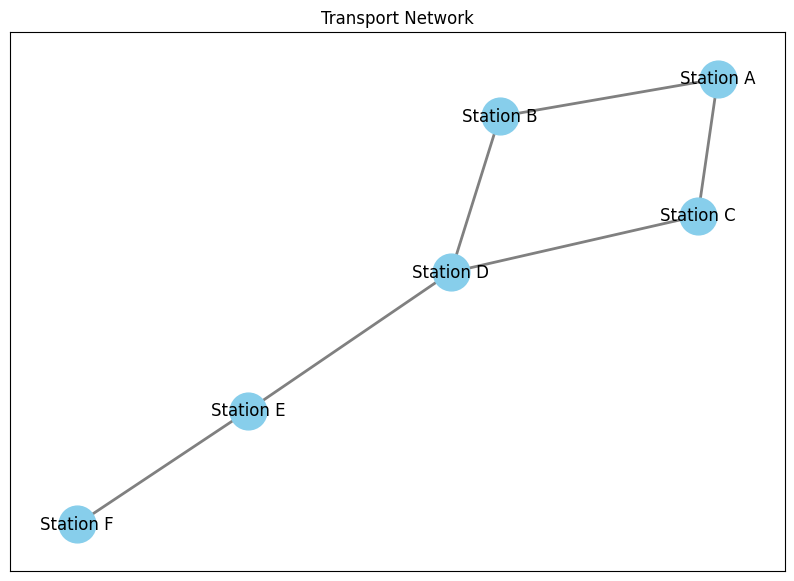

Number of nodes: 6
Number of edges: 6
Degree centrality of nodes:
Station A: 0.40
Station B: 0.40
Station C: 0.40
Station D: 0.60
Station E: 0.40
Station F: 0.20


In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Створення графа
G = nx.Graph()

# Додавання вершин (станцій метро)
stations = ["Station A", "Station B", "Station C", "Station D", "Station E", "Station F"]
G.add_nodes_from(stations)

# Додавання ребер (з'єднань між станціями)
edges = [("Station A", "Station B"),
         ("Station A", "Station C"),
         ("Station B", "Station D"),
         ("Station C", "Station D"),
         ("Station D", "Station E"),
         ("Station E", "Station F")]

G.add_edges_from(edges)

# Візуалізація графа
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G)  # позиціонування вузлів

nx.draw_networkx_nodes(G, pos, node_size=700, node_color="skyblue")
nx.draw_networkx_edges(G, pos, width=2, edge_color="grey")
nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")

plt.title("Transport Network")
plt.show()

# Аналіз графа
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
degree_centrality = nx.degree_centrality(G)

print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print("Degree centrality of nodes:")
for node, centrality in degree_centrality.items():
    print(f"{node}: {centrality:.2f}")


# Завдання 2

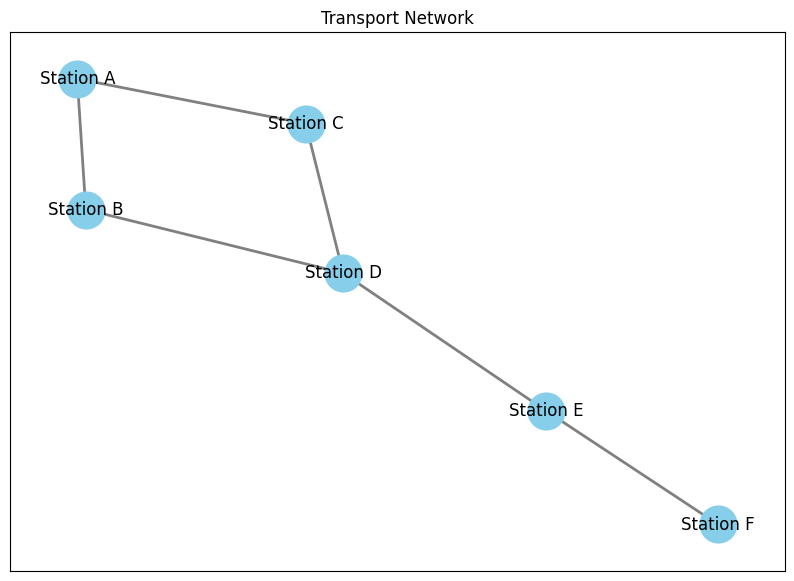

DFS path: ['Station A', 'Station B', 'Station D', 'Station C', 'Station E', 'Station F']
BFS path: ['Station A', 'Station B', 'Station C', 'Station D', 'Station E', 'Station F']


In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Створення графа
G = nx.Graph()

# Додавання вершин (станцій метро)
stations = ["Station A", "Station B", "Station C", "Station D", "Station E", "Station F"]
G.add_nodes_from(stations)

# Додавання ребер (з'єднань між станціями)
edges = [("Station A", "Station B"),
         ("Station A", "Station C"),
         ("Station B", "Station D"),
         ("Station C", "Station D"),
         ("Station D", "Station E"),
         ("Station E", "Station F")]

G.add_edges_from(edges)

# Візуалізація графа
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G)  # позиціонування вузлів

nx.draw_networkx_nodes(G, pos, node_size=700, node_color="skyblue")
nx.draw_networkx_edges(G, pos, width=2, edge_color="grey")
nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")

plt.title("Transport Network")
plt.show()

# Функція для алгоритму DFS
def dfs(graph, start, path=None):
    if path is None:
        path = []
    path.append(start)
    for neighbor in graph[start]:
        if neighbor not in path:
            path = dfs(graph, neighbor, path)
    return path

# Функція для алгоритму BFS
def bfs(graph, start):
    visited = []
    queue = [start]
    while queue:
        vertex = queue.pop(0)
        if vertex not in visited:
            visited.append(vertex)
            queue.extend([n for n in graph[vertex] if n not in visited])
    return visited

# Виконання алгоритмів
dfs_path = dfs(G, "Station A")
bfs_path = bfs(G, "Station A")

print("DFS path:", dfs_path)
print("BFS path:", bfs_path)


# Завдання 3

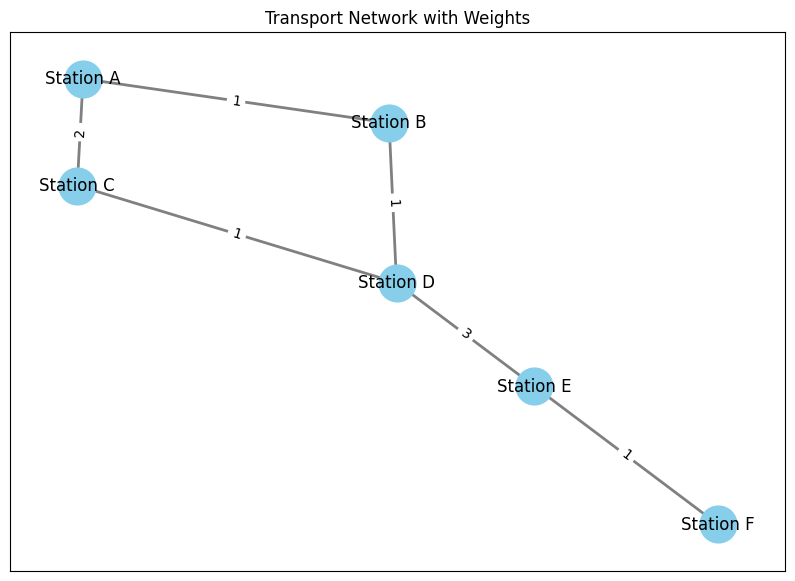

Shortest paths from Station A:
Destination: Station A, Previous: None, Total weight: 0
Destination: Station B, Previous: Station A, Total weight: 1
Destination: Station C, Previous: Station A, Total weight: 2
Destination: Station D, Previous: Station B, Total weight: 2
Destination: Station E, Previous: Station D, Total weight: 5
Destination: Station F, Previous: Station E, Total weight: 6
Shortest path from Station A to Station F: ['Station A', 'Station B', 'Station D', 'Station E', 'Station F']


In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Створення графа
G = nx.Graph()

# Додавання вершин (станцій метро)
stations = ["Station A", "Station B", "Station C", "Station D", "Station E", "Station F"]
G.add_nodes_from(stations)

# Додавання ребер (з'єднань між станціями) з вагами
edges_with_weights = [("Station A", "Station B", 1),
                      ("Station A", "Station C", 2),
                      ("Station B", "Station D", 1),
                      ("Station C", "Station D", 1),
                      ("Station D", "Station E", 3),
                      ("Station E", "Station F", 1)]

G.add_weighted_edges_from(edges_with_weights)

# Візуалізація графа
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G)  # позиціонування вузлів

nx.draw_networkx_nodes(G, pos, node_size=700, node_color="skyblue")
nx.draw_networkx_edges(G, pos, width=2, edge_color="grey")
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)})
nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")

plt.title("Transport Network with Weights")
plt.show()

# Реалізація алгоритму Дейкстри
def dijkstra(graph, start):
    shortest_paths = {start: (None, 0)}
    current_node = start
    visited = set()

    while current_node is not None:
        visited.add(current_node)
        destinations = graph[current_node]
        weight_to_current_node = shortest_paths[current_node][1]

        for next_node in destinations:
            weight = graph[current_node][next_node]['weight'] + weight_to_current_node
            if next_node not in shortest_paths:
                shortest_paths[next_node] = (current_node, weight)
            else:
                current_shortest_weight = shortest_paths[next_node][1]
                if current_shortest_weight > weight:
                    shortest_paths[next_node] = (current_node, weight)

        next_destinations = {node: shortest_paths[node] for node in shortest_paths if node not in visited}
        if not next_destinations:
            return shortest_paths

        current_node = min(next_destinations, key=lambda k: next_destinations[k][1])

    return shortest_paths

# Знаходження найкоротших шляхів від Station A
shortest_paths_from_A = dijkstra(G, "Station A")

# Виведення результатів
print("Shortest paths from Station A:")
for destination, (previous, weight) in shortest_paths_from_A.items():
    print(f"Destination: {destination}, Previous: {previous}, Total weight: {weight}")

# Функція для отримання найкоротшого шляху до конкретної вершини
def get_path(shortest_paths, start, end):
    path = []
    node = end
    while node is not None:
        path.append(node)
        next_node = shortest_paths[node][0]
        node = next_node
    path = path[::-1]
    return path

# Приклад отримання шляху
end_station = "Station F"
path_to_end = get_path(shortest_paths_from_A, "Station A", end_station)
print(f"Shortest path from Station A to {end_station}: {path_to_end}")


## Висновки

У цьому домашньому завданні ми розглянули різні алгоритми пошуку та знаходження найкоротших шляхів у графах. Наведені нижче висновки підсумовують результати кожного завдання:

### Завдання 1: Створення та аналіз графа
- Було створено граф, що моделює транспортну мережу міста за допомогою бібліотеки NetworkX.
- Граф містить вершини, які представляють станції метро, та ребра з вагами, які представляють відстані між станціями.
- Візуалізовано граф та проаналізовано основні характеристики, такі як кількість вершин та ребер, ступінь вершин.

### Завдання 2: Алгоритми DFS та BFS
- Реалізовано алгоритми пошуку в глибину (DFS) та пошуку в ширину (BFS) для графа, створеного у першому завданні.
- Порівняно результати виконання обох алгоритмів для знаходження шляхів у графі.
- Виявлено, що BFS знаходить найкоротший шлях у невиважених графах, тоді як DFS може знаходити довші шляхи через глибоке дослідження гілок графа.
- Різниця в отриманих шляхах пояснюється тим, що BFS досліджує всі сусідні вершини перед переходом до наступного рівня, тоді як DFS досліджує якомога глибше по кожній гілці перед поверненням назад.

### Завдання 3: Алгоритм Дейкстри
- Реалізовано алгоритм Дейкстри для знаходження найкоротшого шляху у зваженому графі.
- Додано ваги до ребер графа, що представляють відстані між станціями.
- Знайдено найкоротші шляхи від заданої початкової вершини до всіх інших вершин графа.
- Виявлено, що алгоритм Дейкстри ефективно знаходить найкоротші шляхи у зважених графах, враховуючи ваги ребер.

## Заключення

- Алгоритми DFS та BFS ефективні для різних задач на графах. BFS ідеально підходить для знаходження найкоротших шляхів у невиважених графах, тоді як DFS краще підходить для дослідження всіх можливих шляхів.
- Алгоритм Дейкстри є потужним інструментом для знаходження найкоротших шляхів у зважених графах, що має важливе застосування в реальних задачах, таких як планування маршрутів у транспортних мережах.
- Використання бібліотеки NetworkX значно полегшує роботу з графами та надає потужні інструменти для їх аналізу та візуалізації.

Ці висновки допоможуть зрозуміти основи алгоритмів пошуку та знаходження найкоротших шляхів у графах, а також їхнє практичне застосування у реальних задачах.
